# ** DESAFIO CLUSTERING **

## MATERIA: Aprendizaje automático 1  / ISSD / Tecnicatura Ciencia de Datos e Inteligencia Artificial

## PROFESORA: Ing. Ana Diedrichs

## ALUMNO: Marcos Gallo

## TEMA ELEGIDO: "Chemical Composition of Ceramic Samples"

## FUENTE: UC Irvine Machine Learning Repository

## Presentación y descripción de dataset:                              
El dataset elegido define una clasificación de muestras de cerámica en función de su composición química a partir de fluorescencia de rayos X por dispersión de energía.

- Como información adicional, la página web donde se aloja el archivo describe el objetivo de la recolección de los datos:

Se utilizó la fluorescencia de rayos X por dispersión de energía (EDXRF) para determinar la composición química del cuerpo y el esmalte de celadón en el horno Longquan (en el condado de Dayao) y el horno Jingdezhen. Se seleccionaron cuarenta fragmentos típicos en cuatro eras culturales para investigar las materias primas y la tecnología de cocción. Esperamos identificar los elementos químicos que sean las variables explicativas más sólidas para clasificar las muestras en diferentes eras culturales y hornos.

- Información de las variables:

1. Cerámica.Nombre: nombre de los tipos de cerámica de Longquan y Jindgezhen
2. Parte: una variable categórica binaria ('Cuerpo' o 'Esmalte')
3. Na2O: porcentaje de Na2O (% en peso)
4. MgO: porcentaje de MgO (% en peso)
5. Al2O3: porcentaje de Al2O3 (% en peso)
6. SiO2: porcentaje de SiO2 (% en peso)
7. K2O: porcentaje de K2O (% en peso)
8. CaO: porcentaje de CaO (% en peso)
9. TiO2: porcentaje de TiO2 (% en peso)
10. Fe2O3: porcentaje de Fe2O3 (% en peso)
11. MnO: porcentaje de MnO (ppm)
12. CuO: porcentaje de CuO (ppm)
13. ZnO: porcentaje de ZnO (ppm)
14. PbO2: porcentaje de PbO2 (ppm)
15. Rb2O: porcentaje de Rb2O (ppm)
16. SrO: porcentaje de SrO (ppm)
17. Y2O3: porcentaje de Y2O3 (ppm)
18. ZrO2: porcentaje de ZrO2 (ppm)
19. P2O5: porcentaje de P2O5 (ppm)

## Objetivo:
Lo que se buscará es descubrir patrones en la composición química de las muestras de cerámica. El objetivo es aplicar técnicas de clustering y reducción de dimensionalidad para descubrir esos patrones ocultos y dividir grupos con características comunes.

## Preprocesamiento del Dataset

Realizo una revisión del dataset para preparar los datos.
- **Revisión de Datos Faltantes**: Identifico si hay valores faltantes usando .isnull().sum().

- **Normalización/Estandarización**: Aplico StandardScaler para estandarizar las variables numéricas, lo cual es crucial para los modelos de clustering y reducción de dimensionalidad. Como los métodos de clustering dependen de una medida de distancia en el espacio de las features, es muy importante que las mismas se encuentren en la misma escala.

- **Visualización de Datos**: Utilizo gráficos de pares e histogramas para observar la distribución de las características, esto ayuda a identificar relaciones entre variables y si son necesarias transformaciones adicionales.

In [35]:

# Importo librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score




In [36]:
# Carga del dataset desde la url de origen
df = pd.read_csv("https://archive.ics.uci.edu/static/public/583/chemical+composition+of+ceramic+samples.zip")

In [37]:
# Descripción del dataset veificando el tipo de datos de las variables y estadísticas básicas

pd.set_option('display.width', 1000) # Solo para que las columnas entren en una misma fila
print("Información del dataset:")
print(df.info())
print("Encabezado del dataset:")
print(df.head())
print("\nDescripción estadística del dataset:")
df.describe().T

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5   

,count,mean,std,min,25%,50%,75%,max
Na2O,88.0,0.471705,0.348779,0.03,0.2475,0.375,0.6425,1.88
MgO,88.0,0.430114,0.215030,0.07,0.2700,0.405,0.5300,1.32
Al2O3,88.0,17.460909,4.703422,11.30,13.0075,16.205,21.7075,26.48
SiO2,88.0,69.825114,2.754377,63.88,67.7375,69.990,71.8400,75.95
K2O,88.0,4.978409,0.879467,2.73,4.3375,5.065,5.5900,6.74
CaO,88.0,4.171818,4.305801,0.12,0.1800,2.690,7.9125,13.69
TiO2,88.0,0.101250,0.053430,0.04,0.0700,0.080,0.1300,0.29
Fe2O3,88.0,1.561591,0.604276,0.58,1.0975,1.510,1.9250,3.11
MnO,88.0,818.750000,614.240607,180.00,380.0000,590.000,982.5000,2970.00
CuO,88.0,30.909091,19.096630,0.00,20.0000,30.000,40.0000,80.00


Veo aquí que hay dos columnas que trabajar, la primera columna "Ceramic Name" no la tendré en cuenta porque no aporta información significativa. La segunda columna "Part" hace referencia a que parte de la muestra cerámica, dividiendo en: soporte de arcilla "Body" y el esmalte "Glaze"; esta columna es una variable categórica binaria que convendrá convertir a númerica antes de continuar.

In [38]:
print(df['Part'].unique()) # Verifico los valores únicos que posee la variable "Part"

['Body' 'Glaze']


In [39]:
# Convierto la variable "Part"" en valores numéricos (0 y 1)
df_original = df.copy() # Creo una copia del original para tener en caso de necesitarla
df['Part'] = df['Part'].map({'Body': 0, 'Glaze': 1})  # Ajusta los nombres de categorías


# Verifico los datos transformados
print(df.head())

  Ceramic Name  Part  Na2O   MgO  Al2O3   SiO2   K2O   CaO  TiO2  Fe2O3  MnO  CuO  ZnO  PbO2  Rb2O  SrO  Y2O3  ZrO2  P2O5
0      FLQ-1-b     0  0.62  0.38  19.61  71.99  4.84  0.31  0.07   1.18  630   10   70    10   430    0    40    80    90
1      FLQ-2-b     0  0.57  0.47  21.19  70.09  4.98  0.49  0.09   1.12  380   20   80    40   430  -10    40   100   110
2      FLQ-3-b     0  0.49  0.19  18.60  74.70  3.47  0.43  0.06   1.07  420   20   50    50   380   40    40    80   200
3      FLQ-4-b     0  0.89  0.30  18.01  74.19  4.01  0.27  0.09   1.23  460   20   70    60   380   10    40    70   210
4      FLQ-5-b     0  0.03  0.36  18.41  73.99  4.33  0.65  0.05   1.19  380   40   90    40   360   10    30    80   150


In [40]:
df["Part"].value_counts() # Verifico si la muestra esta balanceada en esta categoría

,count
Part,
0,44
1,44


### Visualización inicial de las variables:

En la diagonal de la gráfica, se muestran histogramas o gráficas de densidad para cada variable numérica de forma individual, lo que ayuda a ver su distribución.

 Dispersión entre Variables: En las otras posiciones, se crean gráficos de dispersión entre pares de variables numéricas. Cada gráfico muestra cómo se relaciona una variable con otra, ayudando a identificar patrones, relaciones lineales, o posibles grupos en los datos.

 Diferenciación de Grupos: Especifico la variable categórica con el parámetro hue='Part', lo cual es útil para ver cómo se distribuyen los datos de acuerdo a esa categoría.

 Me servirá para:

1- Identificar relaciones entre variables, correlaciones visuales o patrones entre pares de variables, relaciones lineales o no lineales.

2- Detectar outliers: Cualquier punto que esté muy alejado de otros en los gráficos de dispersión podría ser un posible outlier.

3- Explorar distribuciones: Los histogramas o gráficas de densidad muestran la distribución de cada variable, ayudando a identificar si están sesgadas o son normales.


In [41]:
# Visualización inicial de las variables
sns.pairplot(df, hue="Part")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Analisando el gráfico se ve que el hecho de filtrar las relaciones entre las variables agrupando por "Part" denotan dos grupos bien diferenciados de valores y relaciones. Esto indica que esta variable va a influir mucho en la agrupación de clústeres.

In [42]:

# Comprobación de datos faltantes
print("Datos faltantes por columna:\n", df.isnull().sum())

Datos faltantes por columna:
 Ceramic Name    0
Part            0
Na2O            0
MgO             0
Al2O3           0
SiO2            0
K2O             0
CaO             0
TiO2            0
Fe2O3           0
MnO             0
CuO             0
ZnO             0
PbO2            0
Rb2O            0
SrO             0
Y2O3            0
ZrO2            0
P2O5            0
dtype: int64


El conjunto de datos está completo y no posee datos faltantes.

In [43]:
# Estandarización de los datos (SOLO para columnas numéricas)
numeric_features = df.select_dtypes(include=np.number).columns # Selecciono aquí sólo las columnas numéricas (Habría sino conflicto con la primer columna)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])  # Aplico StandardScaler solo a las columnas numéricas

# Convierto df_scaled de vuelta a un DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_features, index=df.index) # Reconstruyo el DataFrame con los datos escalados

In [44]:
df_scaled.columns # Verifico los nombres de las columnas del dataframe escalado

Index(['Part', 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'Fe2O3', 'MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5'], dtype='object')

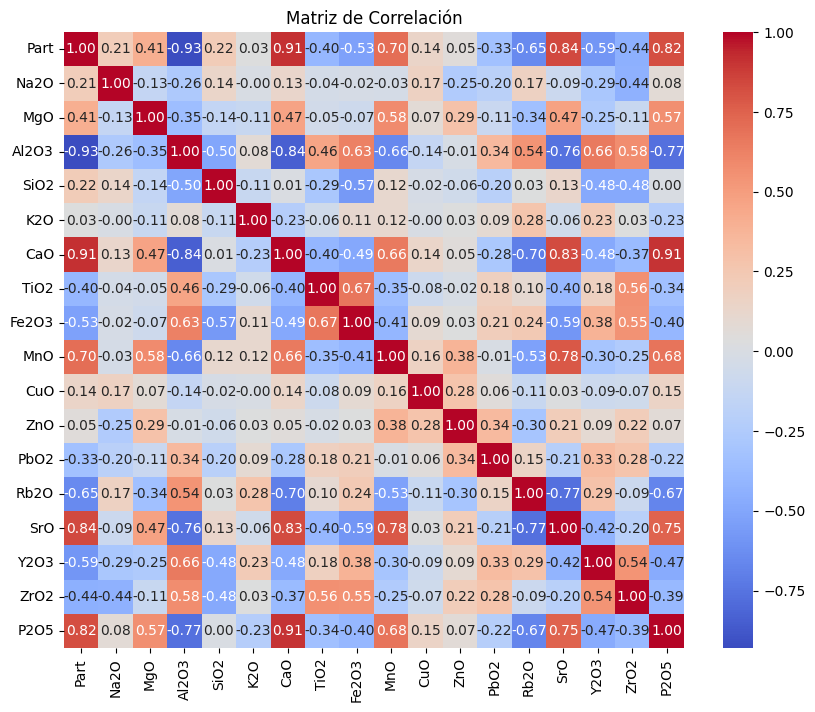

In [45]:
# Calculo la matriz de correlación
correlation_matrix = df_scaled.corr()

# Moestro la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

En el gráfico de la matriz de correlación se observa que existen muchas relaciones marcadas entre las características, algunas directamente proporcionales y otras inversas.

## Entrenamiento de los Modelos

Aplicaré reducción de dimensionalidad con PCA (Análisis de Componentes Principales) para transformar el conjunto de datos de muchas dimensiones a uno con menos dimensiones mientras se mantiene la mayor cantidad posible de la varianza original.

Al reducir el dataset a 2 dimensiones se podrá visualizar patrones, clusters, y relaciones en los datos.

Las componentes principales con menor varianza tienden a capturar más ruido que señal, por lo que al seleccionar solo las componentes principales que explican la mayor parte de la varianza (las primeras dos en este caso), se reduce el ruido en los datos.

In [46]:
# Reducción de Dimensionalidad con PCA
pca = PCA(n_components=2)  # Reduce a 2 componentes principales para visualización
df_pca = pca.fit_transform(df_scaled)

Ahora veo la varianza explicada por cada componente principal en el análisis de PCA, que permite evaluar cuánta información (o varianza) de los datos originales se retiene en cada componente. Luego ver a cuantos componentes puedo reducir para obtener una varianza explicada aceptable sin que se complejise demasiado el modelo.

Varianza explicada por los componentes principales: [0.39524473 0.14952117]


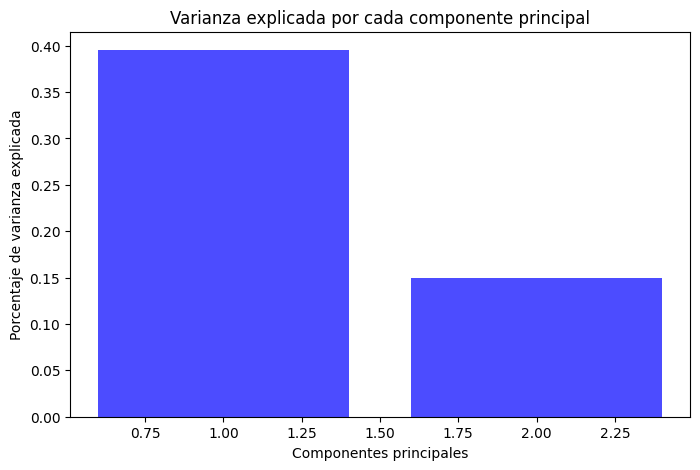

Varianza acumulada con 2 componentes: 54.48%


In [47]:
# Visualización de la varianza explicada
print("Varianza explicada por los componentes principales:", pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, color='b', label='Varianza explicada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Varianza explicada acumulada
varianza_acumulada = sum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con {pca.n_components_} componentes: {varianza_acumulada:.2%}")


Parece ser un valor algo bajo de varianza explicada, la verdad es que buscaba un valor superior a 70%, pero quiero probar aplicar el clustering y observar como se definen los clústeres con este valor primero y poder visualizar en un gráfico 2D los clústeres.

Generaré luego otras reducciones a distinto número de componentes para tener una referencia, agregaré la medición del coeficiente de silhuette para cada reducción y poder analizar como varía.

 ### Cómo elegir k y como hacer una evaluación del modelo

Estrategia para elegir el valor de k y evaluar el modelo de clustering:

Voy a usar como métrica la suma de las distancias cuadráticas de los puntos a sus centroides.

El atributo 'inertia_' del modelo kmeans tiene precisamente dicha suma de distancias cuadráticas a los centroides.

A medida que aumentamos el número de clusters, la suma de distancias cuadráticas se achica.

Un criterio para elegir el k es utilizar la regla heurística "del codo", en donde se elige el k a partir del cual la curva se empieza a aplanar. Es decir, a partir del cual la incorporación de un nuevo cluster no explica mucha más varianza de los datos.


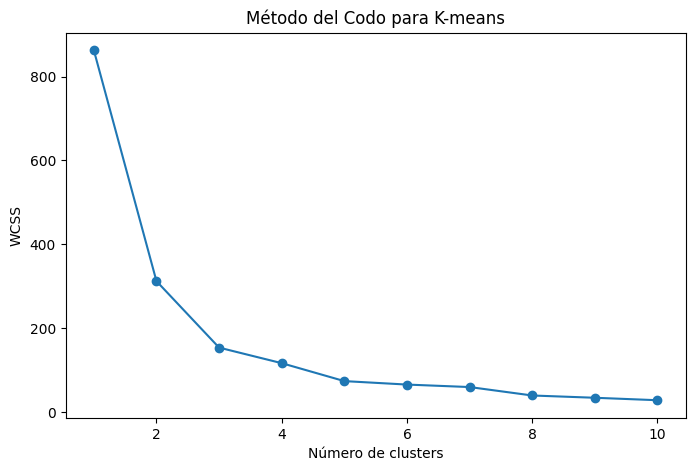

In [48]:
# Método del Codo para determinar número óptimo de clusters para K-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo para K-means')
plt.show()


#### En este caso, al observar la curva del gráfico, se ve que k=3 es una buena opción.

### Grafico ahora el silhouette score en función de k:
#### **Silhouette score**

El [score Silhouette]  mide cuán cercano es un punto al resto de los que están en su mismo cluster, en relación a cuán cercano es a los puntos del cluster más próximo. Es decir que para cada punto $i$, se tiene un coeficiente $s_i$

$$
s_i=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}
$$

en donde $a(i)$ es la distancia promedio a todos los otros puntos dentro del mismo cluster y $b(i)$ es la distancia promedio a todos los puntos del cluster vecino más cercano. De esta manera

$$
-1\le s_i \le 1
$$

Si $s$ es cercano a 1, significa que el punto $i$ está correctamente etiquetado; $s$ cercano a cero indica que estaría igual de bien (o mal) etiquetarlo con el cluster vecino más cercano y $s$ cercano a -1 significa que el punto $i$ está mal etiquetado y pertenece al cluster vecino.

Para obtener un score del clustering podemos promediar los coeficientes:

$$
S(C)=\frac{1}{k}\sum_{j=1}^k \bar{s}_j
$$

en donde $\bar{s}_j$ es el coeficiente promedio de todos los puntos dentro del cluster j-ésimo.

### Otras métricas de evaluación que se usarán:
#### **Davies-Bouldin Index:**

Un índice de Davies-Bouldin más bajo sugiere clusters bien compactos y separados. Se basa en la relación entre la distancia promedio de los puntos de cada cluster y la distancia entre los centros de los clusters.

#### **Calinski-Harabasz Index:**

Este índice no tiene un rango específico, pero valores altos sugieren clusters bien definidos. Mide la relación entre la dispersión de los puntos dentro de un cluster y la dispersión entre cluster

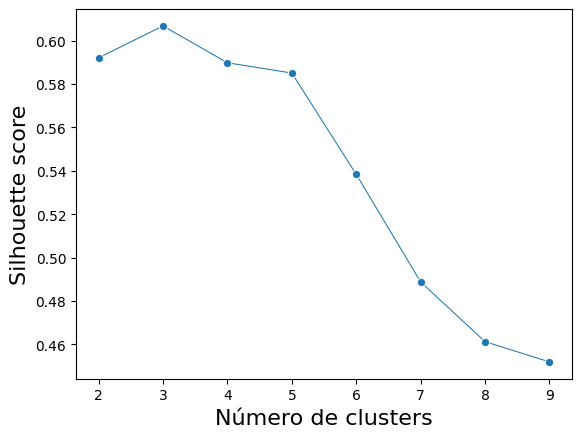

In [49]:
# grafico el valor del silhuette score para diferentes valores de k (número de clústers)
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(df_pca)
    score=silhouette_score(df_pca,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

#### Este gráfico nos muestra el silhouette score promedio para cada valor de k, y nuevamente se ve que el valor óptimo es $k=3$.


### ENTRENO ENTONCES EL MODELO k-MEANS CON EL K=3

Este primer modelo que utilizaré es un algoritmo de partición que agrupa los datos en "k" clusters con base en la distancia a los centroides.



In [50]:
# Entrenamiento del modelo K-means con el número óptimo de clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(df_pca)

Silhouette Score: 0.6067539069133175
Davies-Bouldin Index: 0.5955873889432625
Calinski-Harabasz Index: 196.4519563275001


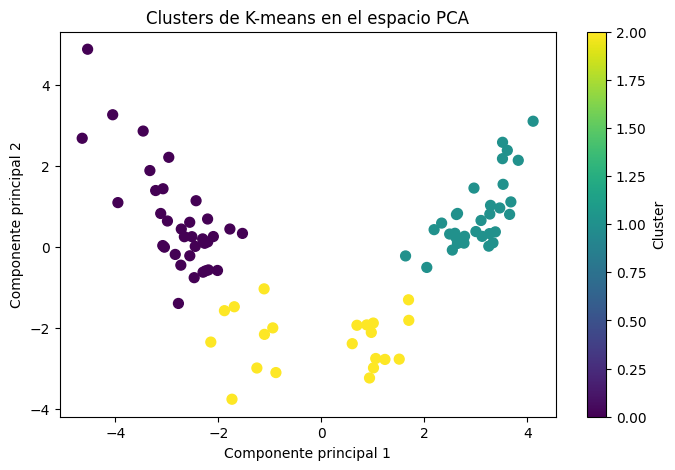

In [51]:

# Cálculo de métricas de evaluación que se utilizarán
silhouette_avg = silhouette_score(df_pca, kmeans_labels)
davies_bouldin = davies_bouldin_score(df_pca, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(df_pca, kmeans_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Visualización de los clusters de K-means en el espacio PCA
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clusters de K-means en el espacio PCA')
plt.colorbar(label='Cluster')
plt.show()


In [52]:
df['Cluster'] = kmeans.fit_predict(df_pca)  # Agrego las etiquetas de clusters al DataFrame

# Creo el pairplot con hue='Cluster' para filtrar las dispersión de las realaciones entre los pares de variables para cada uno de los clústers formados
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Varianza acumulada con 2 componentes: 54.48%
Silhouette Score con 2 componentes: 0.6068

Varianza acumulada con 3 componentes: 62.88%
Silhouette Score con 3 componentes: 0.4816

Varianza acumulada con 4 componentes: 70.30%
Silhouette Score con 4 componentes: 0.4132

Varianza acumulada con 5 componentes: 76.70%
Silhouette Score con 5 componentes: 0.3616

Varianza acumulada con 6 componentes: 81.47%
Silhouette Score con 6 componentes: 0.3302



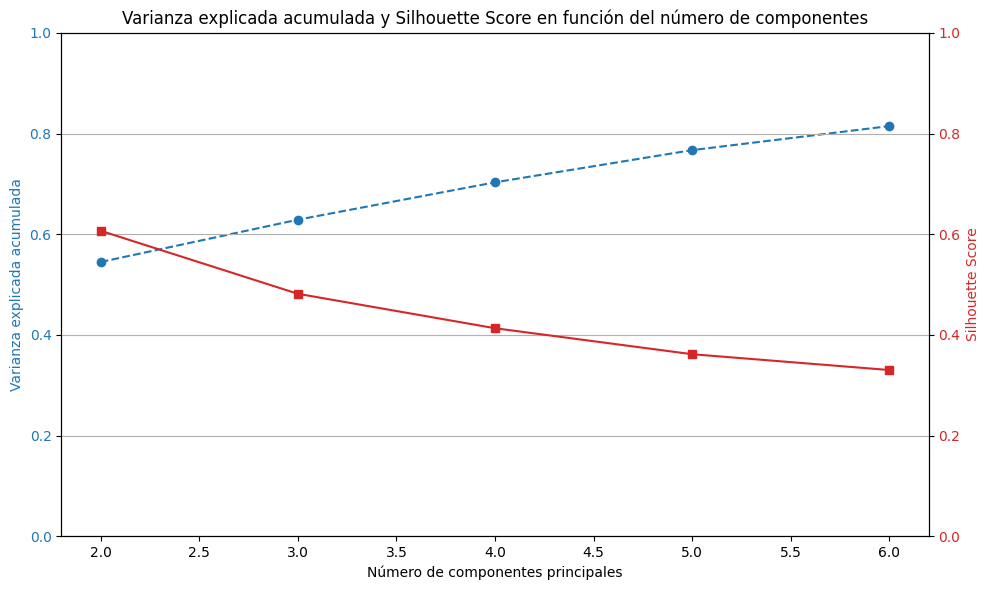

In [53]:

# Listas para almacenar la varianza explicada acumulada y el Silhouette Score para cada número de componentes
varianzas_acumuladas = []
silhouette_scores = []
componentes = [2, 3, 4, 5, 6]  # Número de componentes a probar

# Calcular y almacenar la varianza explicada acumulada y el Silhouette Score para cada número de componentes
for n in componentes:
    # Reducción de dimensionalidad con PCA
    pca = PCA(n_components=n)
    datos_reducidos = pca.fit_transform(df_scaled)  # df_scaled es el DataFrame de los datos escalados
    varianza_acumulada = sum(pca.explained_variance_ratio_)
    varianzas_acumuladas.append(varianza_acumulada)

    # Clustering con KMeans y cálculo del Silhouette Score
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(datos_reducidos)
    silhouette_avg = silhouette_score(datos_reducidos, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Varianza acumulada con {n} componentes: {varianza_acumulada:.2%}")
    print(f"Silhouette Score con {n} componentes: {silhouette_avg:.4f}\n")

# Graficar la varianza explicada acumulada y el Silhouette Score para cada número de componentes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfica de varianza explicada acumulada
color = 'tab:blue'
ax1.set_xlabel('Número de componentes principales')
ax1.set_ylabel('Varianza explicada acumulada', color=color)
ax1.plot(componentes, varianzas_acumuladas, marker='o', linestyle='--', color=color, label='Varianza acumulada')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)  # Asegura que el eje y vaya de 0 a 1 (100%)

# Crear un segundo eje y para el Silhouette Score
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(componentes, silhouette_scores, marker='s', linestyle='-', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)  # Asegura que el Silhouette Score esté en el rango de 0 a 1

# Títulos y ajustes
plt.title('Varianza explicada acumulada y Silhouette Score en función del número de componentes')
fig.tight_layout()
plt.grid()
plt.show()


En este análisis, los resultados muestran cómo la reducción de la dimensionalidad con PCA y su impacto en el Silhouette Score varían al aumentar el número de componentes.

1. **Varianza Explicada:**

La varianza explicada acumulada mide cuánto de la información total (variabilidad) de los datos originales es conservada al usar un cierto número de componentes principales.
Con 2 componentes, se conserva un 54.48% de la información de los datos originales.
A medida que se aumentan los componentes, se conserva más varianza:
Con 3 componentes: 62.88%
Con 4 componentes: 70.30%
Con 5 componentes: 76.70%
Con 6 componentes: 81.47%
Esto indica que, a mayor número de componentes, se pierde menos información del conjunto original, pero también aumenta la complejidad.

2. **Silhouette Score:**

Aquí un valor cercano a 1 indica que los clusters están bien definidos y separados, valores más bajos indican superposición o mala separación de los clusters.

Los resultados muestran que el Silhouette Score disminuye al aumentar el número de componentes:

- Con 2 componentes: 0.6068 (indica un agrupamiento razonable y bien definido)
- Con 3 componentes: 0.4816 (menor calidad de agrupamiento)
- Con 4 componentes: 0.4132
- Con 5 componentes: 0.3616
- Con 6 componentes: 0.3302

Esta caída en el Silhouette Score sugiere que al aumentar el número de componentes (y retener más varianza), el agrupamiento es menos efectivo, posiblemente porque aumenta la complejidad del espacio de datos, generando clusters menos compactos y más superpuestos.

Por lo que veo, 2 componentes ofrecen una mediana retención de la varianza (54.48%) y un agrupamiento de buena calidad (Silhouette Score de 0.6068).
buscando un objetivo con balance entre simplicidad y calidad del agrupamiento, usar 2 componentes podría ser la mejor opción.
Agregar más componentes retiene más información, pero resulta en clusters de menor calidad, lo cual es evidente por la caída del Silhouette Score a medida que se aumentan los componentes.

## Probaré el modelo DBSCAN  (Density-Based Spatial Clustering of Applications with Noise)

Este algoritmo esta basado en densidad y agrupa puntos según la densidad de los vecinos, en el proceso detecta puntos fuera de los clusters como ruido. No requiere especificar el número de clústers, sino que se basa en dos parámetros para definir regiones densas: eps y min_samples.

Para cada punto en el espacio de datos, DBSCAN define una vecindad como una esfera de radio "eps" (radio de vecindad) alrededor del punto. Los puntos dentro de este radio se consideran vecinos cercanos.

El otro parámetro, "min_samples" (mínimo de puntos en vecindad para ser un punto central) es el número mínimo de puntos requeridos en la vecindad (eps) de un punto para que sea considerado un punto central.



Silhouette Score: 0.5509237980787197
Davies-Bouldin Index: 0.9577017873259327
Calinski-Harabasz Index: 117.5135466592442


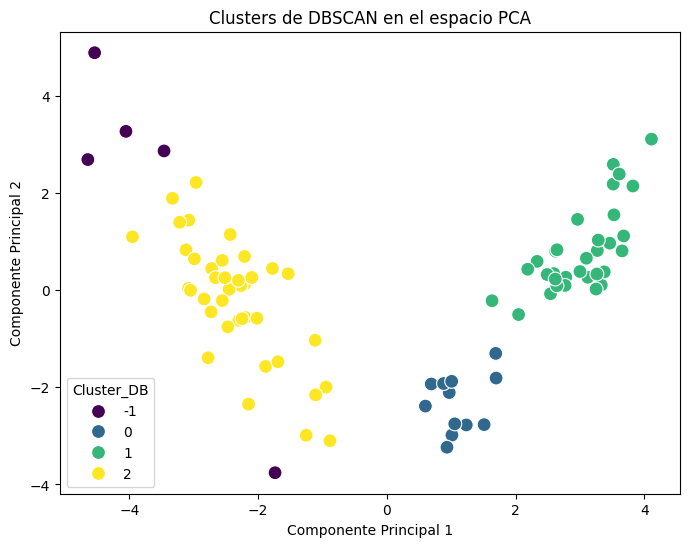

In [54]:
# Aplico  DBSCAN con valores dados de eps y min_samples
db = DBSCAN(eps=0.98, min_samples=6)
clusters = db.fit_predict(df_pca)

# Agregar las etiquetas de los clusters al DataFrame
df['Cluster_DB'] = clusters

# Calcular métricas solo si hay al menos dos clusters válidos (sin contar el ruido)
unique_clusters = set(clusters) - {-1}  # Se ignora de esta manera el ruido (-1)
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(df_pca, clusters)
    davies_bouldin = davies_bouldin_score(df_pca, clusters)
    calinski_harabasz = calinski_harabasz_score(df_pca, clusters)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
else:
    print("No hay suficientes clusters válidos para calcular las métricas.")

# Visualización en el espacio PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster_DB'], palette='viridis', marker='o', s=100)
plt.title('Clusters de DBSCAN en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster_DB')
plt.show()



Al probar este modelo fui modificando el valor de "eps" y "min_samples" y ejecutando el código para visualizar cual era la formación de clústeres y las métricas para cada combinación..

Lo que observé es que con menos de 5 "min_samples" me forma sólo 2 clústers o menos, con valores mayores se mantienen los 3 clústers pero comienza a aumentar el ruido, el valor óptimo que encontré fue "6". Para el "eps" se nota que en valores inferiores a 0,9 los valores de las 3 métricas evaluadas empeoran y el ruido aumenta. Preferí dejar ese valor de "0,98" en "eps", con él los valores de las métricas obtenidas se asercaron bastante a las obtenidas por el modelo K-means.

## CONCLUSION Y ANALISIS FINAL:

Luego de evaluar con las métricas, el modelo de K-means parece funcionar mejor en estos datos en comparación con DBSCAN. Los clústers generados por K-means están más cohesionados internamente y más separados entre sí, lo cual se refleja en los mejores valores de Silhouette Score, Davies-Bouldin Index y Calinski-Harabasz Index.:


1. Silhouette Score

DBSCAN: 0.551

K-means: 0.607


2. Davies-Bouldin Index

DBSCAN: 0.958

K-means: 0.596


3. Calinski-Harabasz Index

DBSCAN: 117.51

K-means: 196.45


Esto sugiere que en este conjunto de datos, la estructura de clustering más adecuada puede ser la de un modelo de clusters esféricos (como K-means), mientras que DBSCAN, que está basado en densidad, podría no capturar tan bien la estructura. Por lo tanto, en este caso, el modelo K-means sería la opción preferida.

Me queda como duda que los clústeres que obtuve con el modelo DBscan puedan en cierta forma reflejar un agrupamiento con más sentido que el de K-means, siento que debería conocer más sobre el tema tratado (composición química de la cerámica) para poder responder esta pregunta.

Esto refuerza lo que pienso en el sentido de que para obtener un resultado eficiente a la hora de aplicar clustering, se debe tener conocimiento del tema a tratar y de los posibles resultados esperados, para poder establecer la coherencia de los mismos.


## PENDIENTE:
Algo que me queda pendiente por probar es dividir el dataset, filtrado por la columna "Part", separando así dos dataset, uno referido a las muestras del "Body" y otro referido a las muestras del "Glaze". Si bien la muestra de cerámica entiendo que es un todo (y sirve más la información referida al conjunto completo), puede dividirse en las dos partes principales. Luego realizar el estudio y aplicar clustering a los dos dataset por separado, creo que se generarían grupos que brindarían información interesante.

## REFERENCIAS DE CONSULTA:
- Material bibliográfico de la materia Aprendizaje automatico a cargo de Ana Laura Diedrich.
- https://www.datacamp.com/blog/clustering-in-machine-learning-5-essential-clustering-algorithms?utm_source=google&utm_medium=paid_search&utm_campaignid=21057859163&utm_adgroupid=157296746097&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=692112539479&utm_targetid=dsa-2222697810918&utm_loc_interest_ms=&utm_loc_physical_ms=1000045&utm_content=DSA~blog~Machine-Learning&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-es-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-fawnov24&gad_source=1&gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwR6UKXeEYhOjDyd8cbg7NcKxFzHyriIuOVcGEAiDe_9A67T5umnvMIaAhmsEALw_wcB
- Unsupervised Learning | PCA and Clustering | Data Science with Marco
https://www.youtube.com/watch?v=yzG69Zf0U1k
-Agrupación con DBSCAN
https://www.youtube.com/watch?v=RDZUdRSDOok
- Prompt en IA:
   * ¿Cuales algoritmos de aprendisaje no supervisado son los más utilizados?- ¿Que considereaciones debo tener en cuenta para decidir cual aplicar en base al tipo de datos que estoy analizando?
   * ¿cual seria una cantidad de varianza aceptable de información?


